In [21]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import ConnectionPatch
from scipy.integrate import quad
import pandas as pd
%matplotlib inline

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/BreastCancerWisconsin/data/data.csv')

In [3]:
df.shape

(569, 33)

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df[['diagnosis','area_mean']].tail(10)

,diagnosis,area_mean
559,B,403.5
560,B,600.4
561,B,386.0
562,M,716.9
563,M,1347.0
564,M,1479.0
565,M,1261.0
566,M,858.1
567,M,1265.0
568,B,181.0


Text(0.5, 1.0, '')

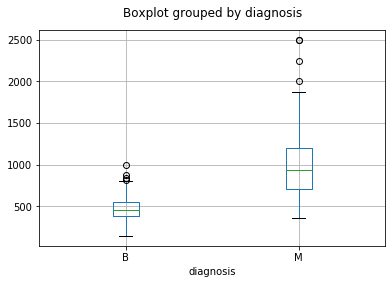

In [6]:
df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

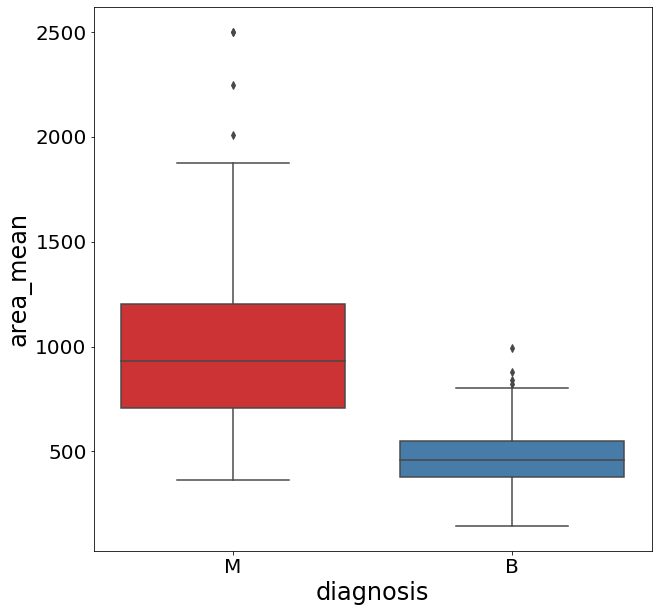

In [7]:
plt.figure(figsize=(10,10))

sns.boxplot(x='diagnosis', y='area_mean', data=df, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('diagnosis', fontsize = 24)
plt.ylabel('area_mean', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [8]:
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

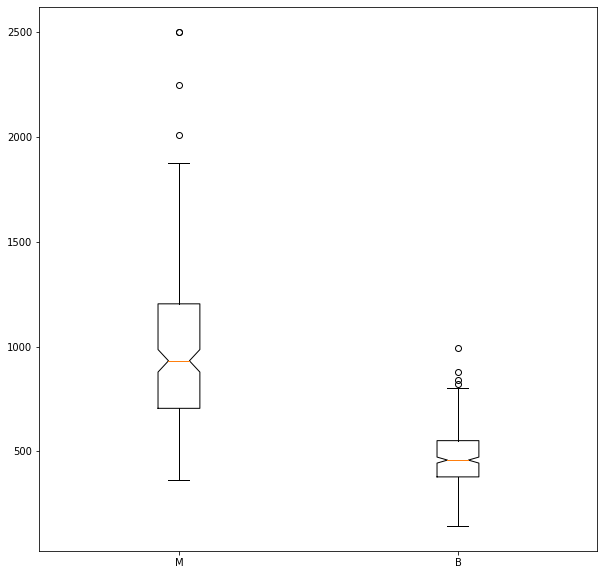

In [9]:
plt.figure(figsize=(10,10))
plt.boxplot([malignant,benign], notch = True, labels=['M', 'B']);

# Correlation and Covariance

In [10]:
import numpy as np

In [11]:
x = [1,2,3,4,5]
y = [3,5,11,11,16]

In [12]:
correlation = np.corrcoef(x,y)
correlation[0][1]

0.9701425001453319

In [13]:
covariance_sample = np.cov(x,y)[0][1]
covariance_sample

8.0

In [14]:
covariance_population = np.cov(x,y,bias=True)[0][1]
covariance_population

6.4

In [15]:
x = [i*2 for i in x]
y = [i*2 for i in y]

In [16]:
x

[2, 4, 6, 8, 10]

In [17]:
y

[6, 10, 22, 22, 32]

In [18]:
covariance_sample = np.cov(x,y)[0][1]
covariance_sample

32.0

In [19]:
covariance_sample = np.cov(y,x)[0][1]
covariance_sample

32.0

# Distributions

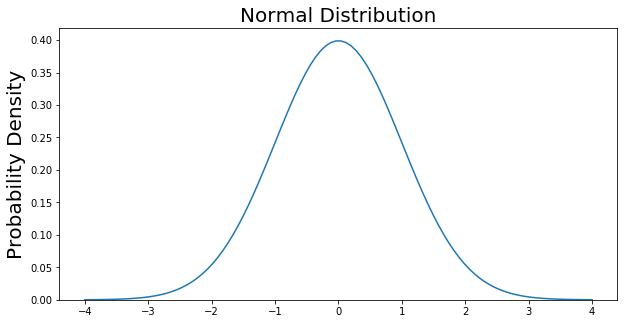

In [20]:
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [23]:
from scipy.stats import skewnorm

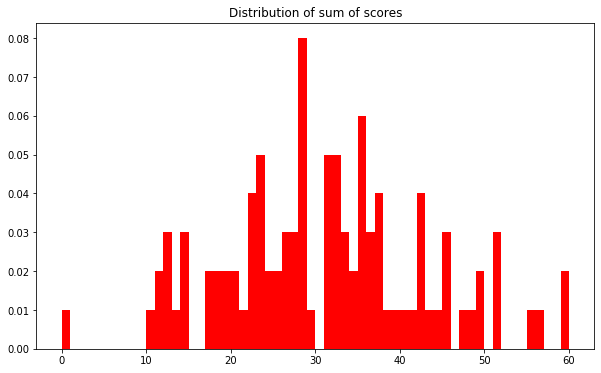

In [26]:
plt.figure(figsize=(10,6))
throws = 100
scores = 60
skewness = 0   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=scores, size=throws)  #Skewnorm function

random = random - min(random)  
random = random / max(random)      
random = random * scores         


plt.hist(random,60,density=True, color = 'red', alpha=1)
plt.title('Distribution of sum of scores')
plt.show()

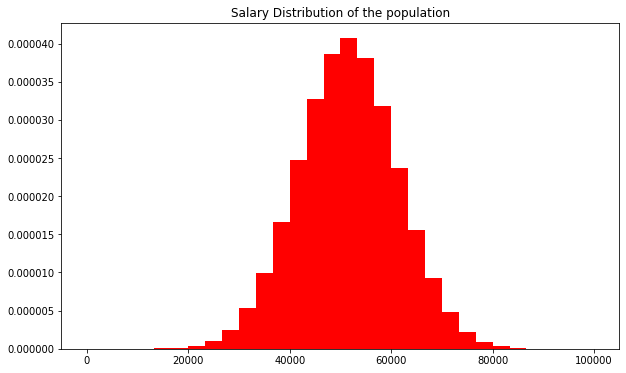

In [27]:
plt.figure(figsize=(10,6))
population = 10000000
salary_range = 100000
skewness = 0   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=salary_range, size=population)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * salary_range         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=1)
plt.title('Salary Distribution of the population')
plt.show()

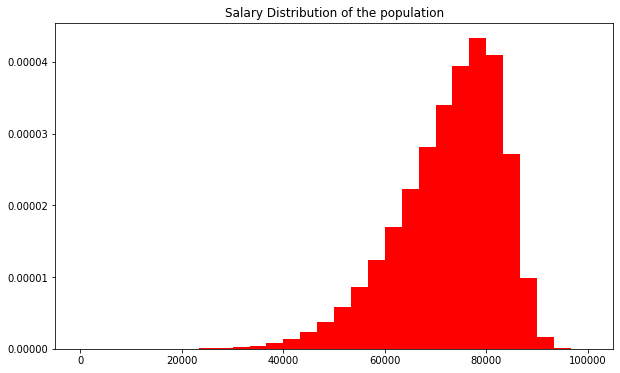

In [28]:
plt.figure(figsize=(10,6))
population = 10000000
salary_range = 100000
skewness = -5   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=salary_range, size=population)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * salary_range         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=1)
plt.title('Salary Distribution of the population')
plt.show()

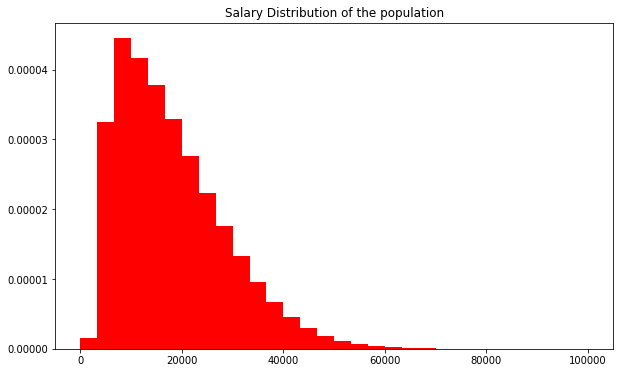

In [29]:
plt.figure(figsize=(10,6))
population = 10000000
salary_range = 100000
skewness = 17   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=salary_range, size=population)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * salary_range         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=1)
plt.title('Salary Distribution of the population')
plt.show()